# Synthesis of a pseudo-mainnet

## Set up packages

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(igraph, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Read data files

### Probes of mainnet nodes

In [2]:
ptNodes <- fread("pt_nodes.csv", stringsAsFactors=TRUE)
ptNodes %>% summary

                                                                id      
 0049eca4703be755cef74ed20e1815b50b5fa0ceb07c6b822c78355dd12fdaa6:   1  
 0078d0f5d825d8946e0809e85fe0f21589294cae912104b3ca9f0e4bb93552c3:   1  
 008c441677a37d339c96a2bf2c9aa377e2411a00eb9d4588e3362043f0d7b744:   1  
 012200f2a61b1d302998036a06091f074f95125848e9caff9f0d23e392538936:   1  
 012c09d9b08f7c26d9076a0aea43ead69de74de251de49c6ba67e40d0613053b:   1  
 01567bed7019b7452a243cb66b3e8cc433c2eafe4d7569e49227d61bcfd6d33f:   1  
 (Other)                                                         :2195  
               n2n_version   peer_sharing      asn                   country   
 NodeToNodeVersionV10:   1   f: 745       Min.   :   209   Germany       :528  
 NodeToNodeVersionV11:   1   t:1456       1st Qu.: 14061   United States :502  
 NodeToNodeVersionV13: 869                Median : 20860   Canada        :154  
 NodeToNodeVersionV14:1330                Mean   : 61266   Japan         :123  
                

### Probes of mainnet edges

In [3]:
ptEdges <- fread("pt_edges.csv", stringsAsFactors=TRUE)
ptEdges %>% summary

                                                              source     
 99f4b029b0864e19334824015c8d05b34c34353ab7fe36e9da91689ceb512b66:   67  
 7e0520b4ebf8159bd1e219d49fc847efc9fe54332cc36aa5ac2350020c2a4939:   64  
 624d8747537834fe5aa3da126f5647904f2425fb002c72be6fe811fbd671412b:   61  
 73a4c479d08b254dab522708a611981c48e8323ae39ab6ad838c30ba3c8c8811:   59  
 1b80ab54864c57bf4f1e9646d30edf48e4d98e8d70ecaacac89adb3a48be5726:   57  
 4a5c7640e2e4f40870dfe3df1fe942e90f718394bd68de31e5ec9730c5ece414:   57  
 (Other)                                                         :49569  
                                                              target     
 99f4b029b0864e19334824015c8d05b34c34353ab7fe36e9da91689ceb512b66:  194  
 2d8b0cb5e44c3e746e7e29fb025dcb258aaf4df658f41c11bdc6824a9059fb84:  185  
 9b88f53637710f0b577b5cc060e67ceb1fddbee24c18f600b4497829d2e2323f:  181  
 d651218f17c10c040eb944416864971abd396ff8142bda7e2d97e26a7fc3a987:  177  
 d0cca0575254a0c01423d9532b4223e4dc467

### Snapshot of mainnet stakepools

In [4]:
poolCountries <- fread("pool_country.csv", stringsAsFactors=TRUE)
poolCountries %>% summary

    epoch_no        country    no_of_pools         stake           
 Min.   :524   Australia: 1   Min.   :  1.00   Min.   :    120272  
 1st Qu.:524   Austria  : 1   1st Qu.:  1.00   1st Qu.:  32641441  
 Median :524   Belgium  : 1   Median :  5.00   Median :  94785845  
 Mean   :524   Bolivia  : 1   Mean   : 37.09   Mean   : 616847011  
 3rd Qu.:524   Brazil   : 1   3rd Qu.: 23.50   3rd Qu.: 517550850  
 Max.   :524   Canada   : 1   Max.   :537.00   Max.   :7077609940  
               (Other)  :29                                        

### Boundary boxes for countries

In [5]:
countryBoundingBoxes <- fread("country-boundingboxes.csv", stringsAsFactors=TRUE)
countryBoundingBoxes %>% summary

        country    ISO3166 country code    longmin              latmin       
 AT         :  1      :248              Min.   :-179.9850   Min.   :-78.000  
 AV         :  1   ABW:  1              1st Qu.: -59.9168   1st Qu.: -7.080  
 Afghanistan:  1   AE :  1              Median :  10.0000   Median : 10.000  
 Albania    :  1   AT :  1              Mean   :  -0.1206   Mean   :  9.275  
 Algeria    :  1   ATG:  1              3rd Qu.:  39.6500   3rd Qu.: 32.858  
 Andorra    :  1   AV :  1              Max.   : 176.1000   Max.   : 62.000  
 (Other)    :248   BD :  1                                                   
    longmax              latmax           Wrapped   
 Min.   :-174.4170   Min.   :-54.386          :242  
 1st Qu.:   0.4457   1st Qu.:  9.544   WRAPPED: 12  
 Median :  32.5915   Median : 21.000                
 Mean   :  35.9674   Mean   : 23.508                
 3rd Qu.:  75.0000   3rd Qu.: 42.918                
 Max.   : 180.0000   Max.   : 89.000                
     

### ASN to ASN round-trip pings

In [49]:
asn_rtt_stat <- fread("asn_rtt_stat.csv")
asn_rtt_stat %>% summary

      asn1             asn2           rtt_cnt            rtt_avg         
 Min.   :     0   Min.   :     0   Min.   :       1   Min.   :     0.03  
 1st Qu.:  4493   1st Qu.: 34347   1st Qu.:       6   1st Qu.:    30.22  
 Median : 12276   Median : 57073   Median :    2169   Median :    95.40  
 Mean   : 26245   Mean   :115727   Mean   :    6231   Mean   :   114.11  
 3rd Qu.: 32167   3rd Qu.:203296   3rd Qu.:    4326   3rd Qu.:   173.23  
 Max.   :401332   Max.   :401612   Max.   :44991955   Max.   :301077.44  
                                                                         
    rtt_std             rtt_min             rtt_max       
 Min.   :     0.00   Min.   :     0.00   Min.   :      0  
 1st Qu.:     0.82   1st Qu.:    22.19   1st Qu.:     56  
 Median :     3.64   Median :    75.87   Median :    154  
 Mean   :    17.62   Mean   :   101.80   Mean   :    424  
 3rd Qu.:    13.39   3rd Qu.:   161.65   3rd Qu.:    287  
 Max.   :173798.40   Max.   :301077.44   Max.   :35923

### Intra ASN round-trip pings

In [50]:
intra_rtt_stat <- fread("intra_rtt_stat.csv")
intra_rtt_stat %>% summary

    rtt_cnt             rtt_avg         rtt_std         rtt_min 
 Min.   :145057189   Min.   :80.41   Min.   :103.5   Min.   :0  
 1st Qu.:145057189   1st Qu.:80.41   1st Qu.:103.5   1st Qu.:0  
 Median :145057189   Median :80.41   Median :103.5   Median :0  
 Mean   :145057189   Mean   :80.41   Mean   :103.5   Mean   :0  
 3rd Qu.:145057189   3rd Qu.:80.41   3rd Qu.:103.5   3rd Qu.:0  
 Max.   :145057189   Max.   :80.41   Max.   :103.5   Max.   :0  
    rtt_max      
 Min.   :249626  
 1st Qu.:249626  
 Median :249626  
 Mean   :249626  
 3rd Qu.:249626  
 Max.   :249626  

### Country to country round-trip pings

In [74]:
country_rtt_stat <- fread("country_rtt_stat.csv")
country_rtt_stat %>% summary

     cty1               cty2              rtt_cnt             rtt_avg         
 Length:6827        Length:6827        Min.   :        1   Min.   :   0.1315  
 Class :character   Class :character   1st Qu.:     4258   1st Qu.:  98.0432  
 Mode  :character   Mode  :character   Median :    18759   Median : 176.9048  
                                       Mean   :   385491   Mean   : 179.1625  
                                       3rd Qu.:    89268   3rd Qu.: 248.2103  
                                       Max.   :442308114   Max.   :1531.4980  
                                                                              
    rtt_std            rtt_min           rtt_max       
 Min.   :   0.028   Min.   :   0.00   Min.   :      0  
 1st Qu.:   9.609   1st Qu.:  25.17   1st Qu.:    285  
 Median :  26.345   Median : 109.86   Median :    603  
 Mean   :  43.461   Mean   : 122.27   Mean   :   5333  
 3rd Qu.:  56.788   3rd Qu.: 192.67   3rd Qu.:   1392  
 Max.   :4392.409   Max.   :1384

## Create ASN-level totals

### Compare node countries to pool countries

All of the pool countries appear in the list of node countries.

In [6]:
poolCountries[!(`country` %in% ptNodes$`country`), unique(`country`)]

factor(0)
35 Levels: Australia Austria Belgium Bolivia Brazil Canada China ... United States

Twenty-one of the node countries do not appear in the list of pool countries.

In [7]:
ptNodes[!(`country` %in% poolCountries$`country`), unique(`country`)]

[1]                Estonia        Argentina      Viet Nam       Czechia       
 [6] Italy          Portugal       Slovenia       Greece         Denmark       
[11] Chile          Cayman Islands Israel         Malaysia       Luxembourg    
[16] New Caledonia  Iran           Malta          Bulgaria       Mexico        
[21] Peru          
56 Levels:  Argentina Australia Austria Belgium Bolivia Brazil ... Viet Nam

### Use hot-deck imputation to assign missing nodes to countries and ASNs

If the country is missing, then the ASN is also missing.

In [8]:
ptNodes[, .N, .(`Has Country`=`country`!="", `Has ASN`=!is.na(`asn`))]

Has Country,Has ASN,N
<lgl>,<lgl>,<int>
FALSE,FALSE,64
TRUE,TRUE,2137


In [9]:
nonMissing <- ptNodes[`country` != "", .(`country`, `asn`)]
nonMissing %>% dim

[1] 2137    2

In [10]:
nrow(nonMissing)

[1] 2137

In [11]:
assignments <- sample(1:nrow(nonMissing), ptNodes[`country`=="", .N])

In [12]:
ptNodes[`country` =="", `:=`(`country`=nonMissing[assignments, `country`], `asn`=nonMissing[assignments, `asn`])]

### Distribute the stake among the ASNs

In [13]:
nodeFractions <- ptNodes[, .(`no_of_nodes`=.N), .(`country`, `asn`)][, .(`asn`, `no_of_nodes`, `fraction`=`no_of_nodes`/sum(`no_of_nodes`)), .(`country`)]
nodeFractions %>% head

country,asn,no_of_nodes,fraction
<fct>,<int>,<int>,<dbl>
United Kingdom,51167,21,0.18918919
United Kingdom,16276,21,0.18918919
United Kingdom,5607,2,0.01801802
United Kingdom,14061,5,0.04504505
United Kingdom,31898,4,0.03603604
United Kingdom,13037,5,0.04504505


Randomly distribute the pools to ASNs according to a multinomial distribution weighted by the number of nodes in the ASN.

In [14]:
rpools <- function(no_of_pools, fractions) {
    if (sum(no_of_pools) == 0)
        0
    else
        as.numeric(rmultinom(1, no_of_pools, fractions))
}

Distribute the country's stake in proportion to the distribution of pools within the ASN.

In [15]:
asnPools <- poolCountries[
    nodeFractions,
    on="country"
][
    `no_of_pools`>0,
    .(`asn`, `no_of_nodes`, `no_of_pools`=rpools(`no_of_pools`, `fraction`), `stake`), 
    .(`country`)
][,
  .(`asn`, `no_of_nodes`, `no_of_pools`, `stake`=`stake`*`no_of_pools`/sum(`no_of_pools`)),
  .(`country`)
]
asnPools %>% head

country,asn,no_of_nodes,no_of_pools,stake
<fct>,<int>,<int>,<dbl>,<dbl>
United Kingdom,51167,21,10,269659304
United Kingdom,16276,21,11,296625234
United Kingdom,5607,2,0,0
United Kingdom,14061,5,4,107863722
United Kingdom,31898,4,0,0
United Kingdom,13037,5,2,53931861


Check that the resulting disaggregation matches the original marginal distribution.

In [16]:
(
    asnPools[, .(`no_of_pools`=sum(`no_of_pools`), `stake`=round(sum(`stake`))), .(`country`=as.character(`country`))][order(`country`)] == 
    poolCountries[, .(`no_of_pools`, `stake`), .(`country`=as.character(`country`))][order(`country`)]
) %>% all

[1] TRUE

## Create nodes

We want 10,000 nodes.

In [17]:
nodeCount <- 10000

### Resample to increase the number of nodes

In [18]:
extraNodes <- sample(nrow(ptNodes), nodeCount - nrow(ptNodes), replace=TRUE)

In [19]:
expandedNodes <- rbind(
    ptNodes[, .(`country`, `asn`, `id`)],
    ptNodes[extraNodes, .(`country`, `asn`, `id`)]
)
expandedNodes %>% dim

[1] 10000     3

### Assign stakepools

In [20]:
nodeStakes <- asnPools[
    expandedNodes, on=c("country", "asn")
][, 
  .(`id`, `no_of_pools`=rpools(fcoalesce(`no_of_pools`, 0), rep(1, .N)), `stake`), 
  .(`country`, `asn`)
][,
  .(`id`, `stake`=`stake`*`no_of_pools`/sum(`no_of_pools`)),
  .(`country`, `asn`)
]
nodeStakes %>% head

country,asn,id,stake
<fct>,<int>,<fct>,<dbl>
United Kingdom,51167,21d9843c58f843995ae35cd54c3e7c877ee3c4ee482c1db0f48c292ce53b7d64,0
United Kingdom,51167,5c316f80890bc3866d1487bba1d88bb42b46bd77527863db15d8933aa1197f7d,0
United Kingdom,51167,d9af1928ab2e580d8cd8302597dd59ece296253abb863f35492b9a8fcb012a40,0
United Kingdom,51167,ae91419679c22885d5b2b55743f4117cb6a15b90ecc2586603c0e24d92da85ce,0
United Kingdom,51167,4428a4672c1d691c652c1f8dca17f61d4e8daffe0653e0404e2104363eb9e218,0
United Kingdom,51167,d5279a1b4d407448ebcab68c003915433accce7b6a3b1868f8d8198bb55dc7da,0


Check that no stake is missing.

In [21]:
asnPools[, sum(`stake`)] == nodeStakes[, sum(`stake`, na.rm=TRUE)]

[1] TRUE

### Add geographic locations

First make sure that the names align.

In [22]:
nodeStakes[!(`country` %in% countryBoundingBoxes$`country`)]

country,asn,id,stake
<fct>,<int>,<fct>,<dbl>


In [23]:
rlong <- function(longmin, longmax, wrapped) {
    if (wrapped)
        (runif(1, longmax, 360 + longmin) + 180) %% 360 - 180
    else
        runif(1, longmin, longmax)
}

In [24]:
rlat <- function(latmin, latmax) {
    runif(1, latmin, latmax)
}

In [26]:
nodes <- nodeStakes[
    countryBoundingBoxes[, .(`country`, `longmin`, `longmax`, `latmin`, `latmax`, `wrapped`=`Wrapped`=="WRAPPED")], 
    on="country",
    nomatch=0
][,
  .(`index`=.I-1, `country`, `asn`, `id`, `stake`=fcoalesce(`stake`, 0), `long`=mapply(rlong, `longmin`, `longmax`, `wrapped`), `lat`=mapply(rlat, `latmin`, `latmax`))
][,
  .(`index`, `subindex`=1:.N, `stake`, `long`, `lat`),
  .(`country`, `asn`, `id`)
][
    order(-`stake`)
]
nodes %>% head

country,asn,id,index,subindex,stake,long,lat
<fct>,<int>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
China,396982,289f8b9bb1579bbe7709d77becb701f6483d9e6111a1e743629a749410f68f9e,1272,3,105472970,75.125622,46.11755
Ireland,16509,a24670618efd1f89558e0be86e16afc50700852611898da4d7ddbc66d409eb1d,1376,1,102664810,-4.201529,52.12471
Ireland,16509,a24670618efd1f89558e0be86e16afc50700852611898da4d7ddbc66d409eb1d,1436,5,102664810,-5.213518,51.53925
Sweden,29518,422be8a9b4071e260018521141d377b76952ac1c6d458a6f5e02ed32904d12fa,6844,1,86334178,55.301411,58.19664
United Arab Emirates,16509,b9a646720fe83a1ed251d983345bde7d85c2075cc8485fd50f9df64caaba84de,19,4,64328994,53.699679,25.45247
Lithuania,212531,5df19c9f89ba7c5881cf9a7c7683afdde6e39abc0479e14d10b3472d7b31df48,5707,4,60274453,21.976099,55.42198


## Create edges

### Examine summary statistics for edge connectivity

In [27]:
ptEdges[, .(`degree`=.N), .(`source`)][, `degree`] %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.00   36.00   34.46   40.00   67.00 

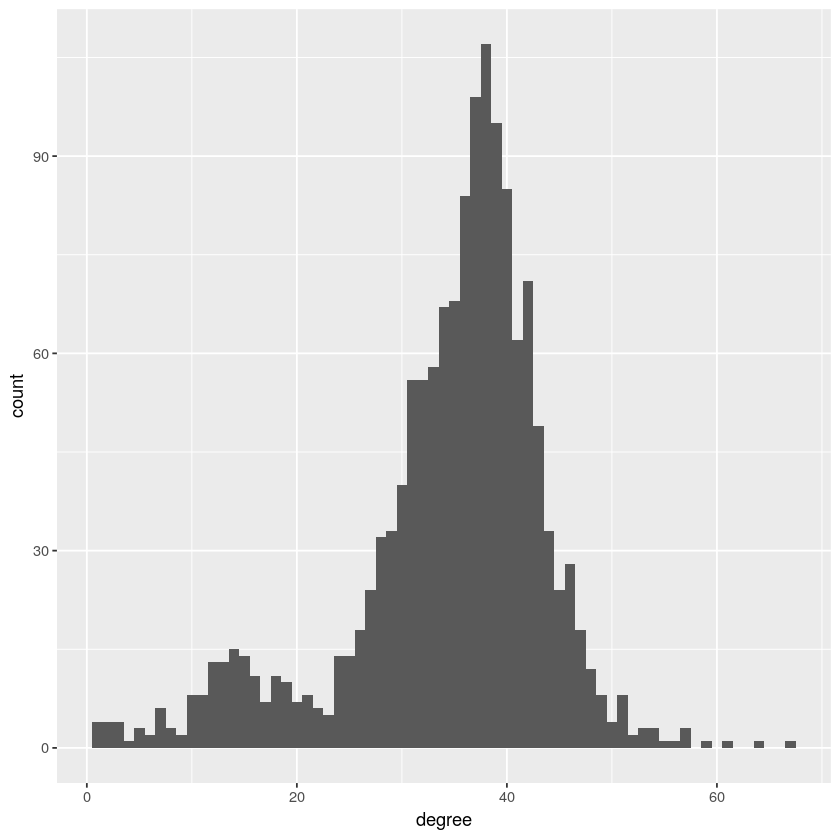

In [28]:
ggplot(
    ptEdges[, .(`degree`=.N), .(`source`)],
    aes(x=`degree`)
) +
    geom_histogram(binwidth=1)

### Connect the empirically observed edges

In [114]:
edges <- nodes[, .(`tindex`=`index`, `tasn`=`asn`, `subindex`, `target`=`id`)][
    nodes[, .(`sindex`=`index`, `sasn`=`asn`, `subindex`, `source`=`id`)][
        ptEdges, on="source", allow.cartesian=TRUE
    ], 
    on=c("target", "subindex"),
    nomatch=0
][,
  .(`source_index`=`sindex`, `source_asn`=`sasn`, `target_index`=`tindex`, `target_asn`=`tasn`)
]
edges %>% dim

[1] 173962      4

### Ensure that each node connects to at least two other relay-like nodes in its ASN

In [115]:
edges <- rbind(
    edges,
    nodes[, .(`tindex`=`index`, `asn`)][
        nodes[, .(`sindex`=`index`, `asn`)], 
        on="asn", 
        allow.cartesian=TRUE
    ][
        `tindex` != `sindex`,
        .(`tindex`, `asn`, `copy`=1:.N),
        .(`sindex`)
    ][
        `copy` <= 3,
        .(`source_index`=`sindex`, `source_asn`=`asn`, `target_index`=`tindex`, `target_asn`=`asn`)
    ]
)

### Ensure that each node connects to at least one other node

In [116]:
disconnected <- nodes[!(`index` %in% edges[, unique(`source_index`)]), .(`source_index`=`index`, `source_asn`=`asn`)]
disconnected %>% nrow

[1] 1

In [117]:
redges <- function(missings) {
    nodes[
        missings[, .(`source_index`, `source_asn`, `target_index`=round(runif(.N, 1, nodeCount)))], 
        on=c("index" = "target_index")
    ][,
        .(`source_index`, `source_asn`, `target_index`=`index`, `target_asn`=`asn`)
    ]
}

In [118]:
edges <- rbind(edges, redges(disconnected))

In [119]:
poorlyConnected <- function()
    edges[, .(`degree`=.N), .(`source_index`, `source_asn`)][`degree` < 20][, .(`source_index`, `source_asn`)]

In [120]:
for (i in 1:20) {
    deficient <- poorlyConnected()
    edges <- rbind(edges, redges(deficient))
}
poorlyConnected() %>% nrow

[1] 0

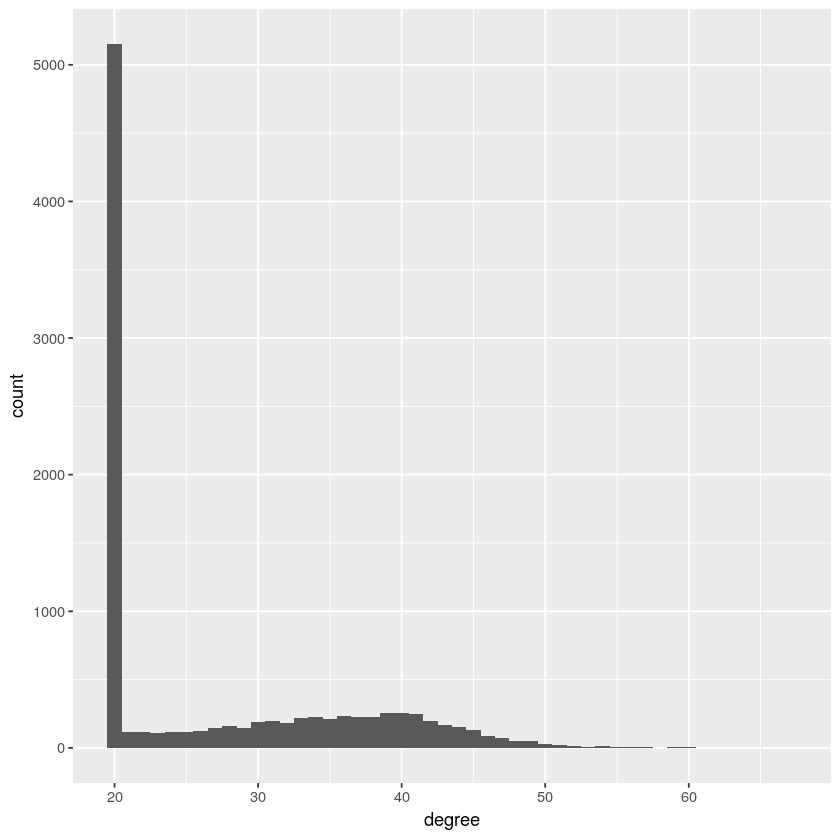

In [121]:
ggplot(
    edges[, .(`degree`=.N), .(`source_index`)],
    aes(x=`degree`)
) +
    geom_histogram(binwidth=1)

We could smear the spike out, but the recommended node configuration suggests 20 active peers.

### Repeat in the reverse direction

#### Ensure that each node connects to at least one other node

In [122]:
disconnected <- nodes[!(`index` %in% edges[, unique(`target_index`)]), .(`target_index`=`index`, `target_asn`=`asn`)]
disconnected %>% nrow

[1] 2

In [123]:
redgesReverse <- function(missings) {
    nodes[
        missings[, .(`target_index`, `target_asn`, `source_index`=round(runif(.N, 1, nodeCount)))], 
        on=c("index" = "source_index")
    ][,
        .(`source_index`=`index`, `source_asn`=`asn`, `target_index`, `target_asn`)
    ]
}

In [124]:
edges <- rbind(edges, redgesReverse(disconnected))

In [125]:
poorlyConnectedReverse <- function()
    edges[, .(`degree`=.N), .(`target_index`, `target_asn`)][`degree` < 20][, .(`target_index`, `target_asn`)]

In [126]:
for (i in 1:20) {
    deficient <- poorlyConnectedReverse()
    edges <- rbind(edges, redgesReverse(deficient))
}
poorlyConnectedReverse() %>% nrow

[1] 0

### Give every node five more random peers

In [127]:
for (i in 1:5) {
    edges <- rbind(
        edges, 
        redges(
            nodes[
                sample(1 * nodeCount, nodeCount, replace=TRUE),
                .(`source_index`=`index`, `source_asn`=`asn`)
            ]
        )
    )
}

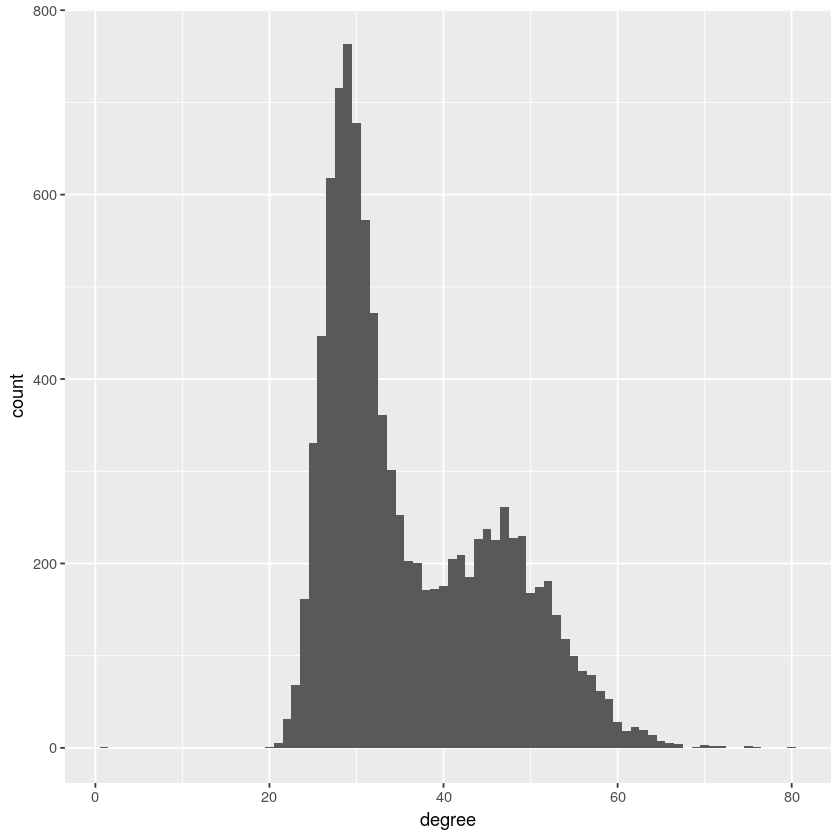

In [128]:
ggplot(
    edges[, .(`degree`=.N), .(`source_index`)],
    aes(x=`degree`)
) +
    geom_histogram(binwidth=1)

### Check that the graph is connected

In [172]:
g <- graph_from_data_frame(edges[, .(`source_index`, `target_index`)])

In [173]:
is.connected(g, mode="strong")

[1] TRUE

In [175]:
g <- graph_from_data_frame(edges[, .(`target_index`, `source_index`)])

In [176]:
is.connected(g, mode="strong")

[1] TRUE

## Assign latencies

### Assign as many latencies as possible at the ASN to ASN level

In [147]:
rrtt <- function(rtt_min, rtt_max, rtt_avg, rtt_std) {
    if (is.na(rtt_std))
        rtt_avg / 2
    else
        max(rtt_min, min(rtt_max, rnorm(1, rtt_avg, rtt_std))) / 2
}

In [148]:
latencies <- rbind(
    asn_rtt_stat[edges, on=c("asn1" = "source_asn", "asn2" = "target_asn"), nomatch=0],
    asn_rtt_stat[edges, on=c("asn2" = "source_asn", "asn1" = "target_asn"), nomatch=0]
)[,
    .(
        `rtt`=mapply(rrtt, `rtt_min`, min(`rtt_max`, 1000), min(`rtt_avg`, 1000), `rtt_std`)
    ),
    .(
        `source_index`,
        `target_index`
    )
]
latencies %>% summary

  source_index   target_index       rtt         
 Min.   :   0   Min.   :   0   Min.   :  0.000  
 1st Qu.:2257   1st Qu.:2355   1st Qu.:  2.831  
 Median :3789   Median :3796   Median : 10.325  
 Mean   :4337   Mean   :4306   Mean   : 29.551  
 3rd Qu.:6610   3rd Qu.:6341   3rd Qu.: 48.272  
 Max.   :9996   Max.   :9996   Max.   :500.000  

### Assign intra ASN latencies for edges that don't yet have latencies

In [152]:
latencies <- rbind(
    latencies,
    latencies[edges, on=.NATURAL][
        is.na(`rtt`) & `source_asn` == `target_asn`,
        .(`rtt`=rrtt(max(intra_rtt_stat$rtt_min, 2), intra_rtt_stat$rtt_max, intra_rtt_stat$rtt_avg, intra_rtt_stat$rtt_std)),
        .(`source_index`, `target_index`)
    ]
)
latencies %>% summary

  source_index   target_index       rtt         
 Min.   :   0   Min.   :   0   Min.   :  0.000  
 1st Qu.:2292   1st Qu.:2317   1st Qu.:  2.846  
 Median :3967   Median :3836   Median : 11.666  
 Mean   :4475   Mean   :4399   Mean   : 31.485  
 3rd Qu.:6846   3rd Qu.:6614   3rd Qu.: 52.221  
 Max.   :9999   Max.   :9999   Max.   :500.000  

### Assign remaining latencies

In [181]:
g <- graph_from_data_frame(latencies)
g %>% summary

IGRAPH d2c5462 DN-- 10000 189789 -- 
+ attr: name (v/c), rtt (e/n)
